In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import numpy as np


In [2]:
u10 = xr.open_zarr("/datasets/zarr_data_uvsp_swh_mwp/10m_u_component_of_wind.zarr")


/usr/local/lib/python3.10/dist-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [3]:
u101 = xr.open_zarr("/datasets/zarr_data_uvsp_swh_mwp_1/10m_u_component_of_wind.zarr")
u102 = xr.open_zarr("/datasets/zarr_data_uvsp_swh_mwp_2/10m_u_component_of_wind.zarr")

/usr/local/lib/python3.10/dist-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [3]:
u10

<xarray.Dataset> Size: 66GB
Dimensions:    (latitude: 165, longitude: 169, time: 298056)
Coordinates:
  * latitude   (latitude) float32 660B 42.0 41.75 41.5 41.25 ... 1.5 1.25 1.0
  * longitude  (longitude) float32 676B 98.0 98.25 98.5 ... 139.5 139.8 140.0
  * time       (time) datetime64[ns] 2MB 1987-01-01 ... 2020-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float64 66GB dask.array<chunksize=(1, 165, 169), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-08-02 05:38:04 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [5]:
u102

<xarray.Dataset> Size: 33MB
Dimensions:    (latitude: 721, longitude: 1440, time: 4)
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * time       (time) datetime64[ns] 32B 2015-09-27 ... 2015-09-27T18:00:00
Data variables:
    u10        (time, latitude, longitude) float64 33MB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-08-02 09:34:43 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [8]:
[
np.nanmax(u10['u10'].sel(time="2015-09-27T04:00:00", method="nearest")),
np.nanmin(u10['u10'].sel(time="2015-09-27T04:00:00", method="nearest")),
np.nanmean(u10['u10'].sel(time="2015-09-27T04:00:00", method="nearest")),
]

[19.812167996942424, -16.74713498766433, 0.40192973984933694]

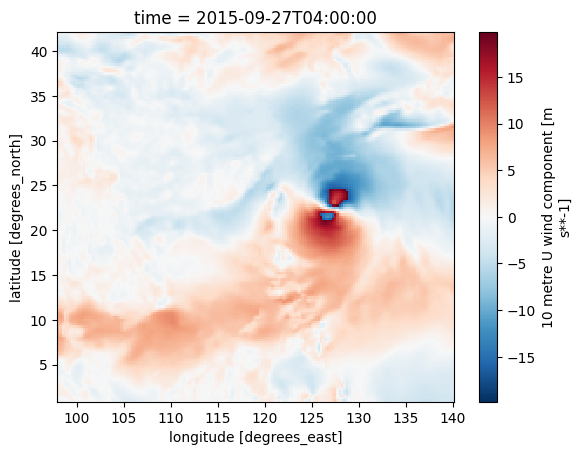

In [3]:
u10['u10'].sel(time="2015-09-27T04:00:00", method="nearest").plot()

In [ ]:
u10 = xr.open_zarr("/datasets/zarr_data_uv_1980/10m_u_component_of_wind.zarr")

In [9]:
u10 = xr.open_zarr("/datasets/zarr_data_uvsp_swh_mwp/10m_u_component_of_wind.zarr")
# data = xarray.open_zarr("/datasets/zarr_data_temp/10m_v_component_of_wind.zarr")
# data = xarray.open_zarr("/datasets/zarr_data_temp/surface_pressure.zarr")
mwp = xr.open_zarr("/datasets/zarr_data_uvsp_swh_mwp/mean_wave_period.zarr")
hs = xr.open_zarr("/datasets/zarr_data_uvsp_swh_mwp/significant_height_of_combined_wind_waves_and_swell.zarr")

In [10]:
np.nanmax(hs['swh'][0,].values)


5.582637616680981

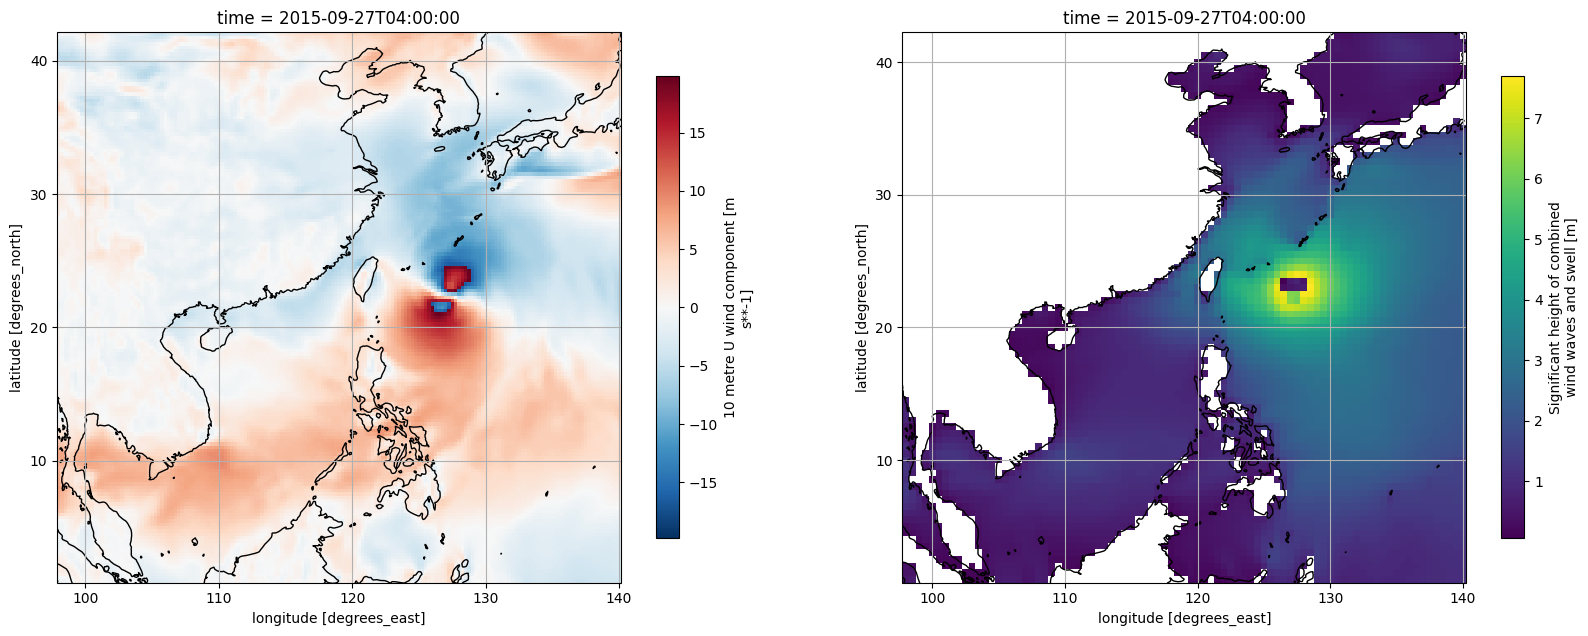

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

ax1.coastlines(resolution="50m")
# 添加经纬度坐标
ax1.set_xticks(range(-180, 181, 10), crs=ccrs.PlateCarree())
ax1.set_yticks(range(-90, 91, 10), crs=ccrs.PlateCarree())
ax1.gridlines(draw_labels=False)
plot1 = u10['u10'].sel(time="2015-09-27T04:00:00", method="nearest").plot(ax=ax1, transform=ccrs.PlateCarree(),cbar_kwargs={"shrink": 0.6})

# # 设置显示范围（放大显示某个区域）
# min_lon, max_lon = 120, 130  # 替换为你想要的经度范围
# min_lat, max_lat = 20, 30   # 替换为你想要的纬度范围
# ax2.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

ax2.coastlines(resolution="50m")
# 添加经纬度坐标
ax2.set_xticks(range(-180, 181, 10), crs=ccrs.PlateCarree())
ax2.set_yticks(range(-90, 91, 10), crs=ccrs.PlateCarree())
ax2.gridlines(draw_labels=False)
plot2 = hs['swh'].sel(time="2015-09-27T04:00:00", method="nearest").plot(ax=ax2, transform=ccrs.PlateCarree(),cbar_kwargs={"shrink": 0.6})

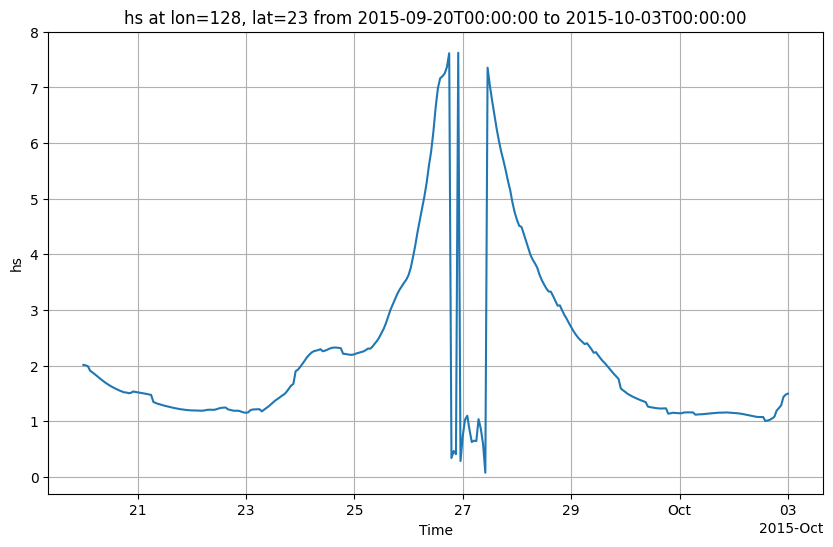

In [23]:

start_time = "2015-09-20T00:00:00"  # 开始时间
end_time = "2015-10-03T00:00:00"    # 结束时间
hs_time_range = hs['swh'].sel(time=slice(start_time, end_time))

# 选择特定经纬度点的数据
lon, lat = 128, 23  # 经纬度
hs_point = hs_time_range.sel(longitude=lon, latitude=lat, method="nearest")

# 绘制时间序列图
plt.figure(figsize=(10, 6))
hs_point.plot()
plt.title(f'hs at lon={lon}, lat={lat} from {start_time} to {end_time}')
plt.xlabel('Time')
plt.ylabel('hs')
plt.grid(True)
plt.show()